In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
dataset_train = pd.read_csv('forml.csv')  # 讀取
dataset_train.drop(['Unnamed: 0','date','day','month','year','D+1','D+3','D+5','D+7'],axis=1,inplace=True)
training_data = dataset_train[:7038]
test_data = dataset_train[7038:7768]
print(training_data.shape)
print(test_data.columns)
print(training_data.shape[1])

(7038, 19)
Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'pressure',
       'temperature', 'humidity', 'windspeed', 'wind_direction',
       'maximum_windspeed_x', 'maximum_wind_direction', 'rainfall', 'volume',
       'level', 'alarms_count', 'price'],
      dtype='object')
19


In [3]:
#sc = MinMaxScaler(feature_range=(0,1))
sc = StandardScaler()
training_data_sc = sc.fit_transform(training_data)
test_data_sc = sc.transform(test_data)
print(training_data_sc[1,18])

-0.8126060181758046


In [4]:
def createXY(dataset, n_past):
    X = []
    y = []
    for i in range(n_past, len(dataset)):
        X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
        y.append(dataset[i,18])
    return np.array(X),np.array(y)

In [5]:
train_X, train_y = createXY(training_data_sc, 15)
test_X, test_y = createXY(test_data_sc,15)

In [6]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (15,19)))
#regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [7]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(train_X, train_y, epochs = 50, batch_size = 128)

Epoch 1/50
55/55 [==============================] - 7s 36ms/step - loss: 0.3120
Epoch 2/50
55/55 [==============================] - 2s 33ms/step - loss: 0.1645
Epoch 3/50
55/55 [==============================] - 2s 33ms/step - loss: 0.1220
Epoch 4/50
55/55 [==============================] - 2s 32ms/step - loss: 0.0971
Epoch 5/50
55/55 [==============================] - 2s 33ms/step - loss: 0.0850
Epoch 6/50
55/55 [==============================] - 2s 31ms/step - loss: 0.0785
Epoch 7/50
55/55 [==============================] - 2s 31ms/step - loss: 0.0704
Epoch 8/50
55/55 [==============================] - 2s 31ms/step - loss: 0.0639
Epoch 9/50
55/55 [==============================] - 2s 36ms/step - loss: 0.0594
Epoch 10/50
55/55 [==============================] - 2s 34ms/step - loss: 0.0558
Epoch 11/50
55/55 [==============================] - 2s 35ms/step - loss: 0.0520
Epoch 12/50
55/55 [==============================] - 2s 35ms/step - loss: 0.0488
Epoch 13/50
55/55 [==================

In [8]:
predicted_price = regressor.predict(test_X)
predicted_price_array = np.repeat(predicted_price,19,axis=-1)
pred = sc.inverse_transform(np.reshape(predicted_price_array,(len(predicted_price),19)))[:,18]
print(pred)

23/23 [==============================] - 1s 6ms/step
[ 9.61389    9.870801   9.024233   9.842815   8.810467   7.6555915
  7.842381   7.646013   7.928867   7.160437   7.5782     9.069427
  9.880808   8.7831955  9.631118   8.769185   8.799706   9.077922
  8.228344   9.3088045  8.363851   7.5545983  7.890989   8.418901
  7.8908267  7.4513917  8.015079   9.131061   9.534187   9.711438
  9.160271  13.393504  10.94051   11.705709  11.337161  11.591642
 14.329578  11.88357   10.84192   11.304606  12.47809   11.367888
 11.388598  10.987145  12.117763  14.503061  13.474355  12.210234
  9.080858  10.181876   9.906754  11.182144  14.564339  14.329995
 11.753233  11.95603   14.505862  13.590331  13.239874  12.86523
 13.442148  13.715953  15.096984  14.976105  17.419157  12.666197
 14.186055  15.3764925 16.699238  20.004124  17.863613  17.371181
 16.707619  21.10357   21.591661  19.090174  19.289087  21.952784
 18.654305  21.562891  19.734554  19.968224  19.840101  18.507116
 19.313583  19.879564  

In [9]:
real_price_array = np.repeat(test_y,19,axis=-1)
real = sc.inverse_transform(np.reshape(real_price_array,(len(test_y),19)))[:,18]

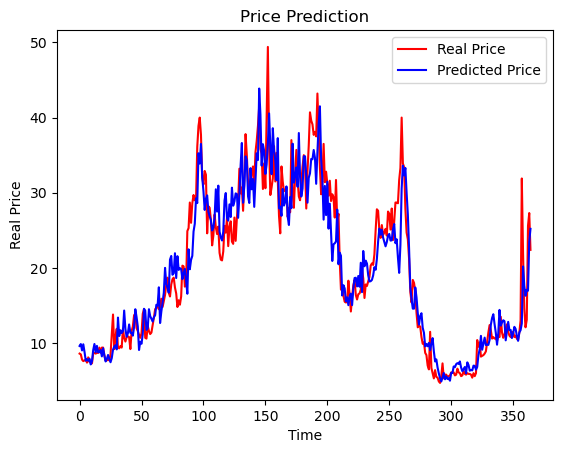

In [10]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real Price')  # 紅線表示真實股價
plt.plot(pred, color = 'blue', label = 'Predicted Price')  # 藍線表示預測股價
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Real Price')
plt.legend()
plt.show()